In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
def readexcel(filepath,filename):
	import os
	os.chdir(filepath)
	file = pd.read_excel(filename)

	return file

filepath = "/content/drive/MyDrive/Day1 python"
filename = "startup_funding123.xlsx"

df = readexcel(filepath,filename)
print(df.head(3))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
print("First 5 rows:")
print(df.head())
print("/nDataset Info:")
print(df.info())
print("/nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('No_Specified')
df['City_Location'] = df['City_Location'].fillna('No_Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
df.to_csv('cleaned_startup_funding.csv',index=False)

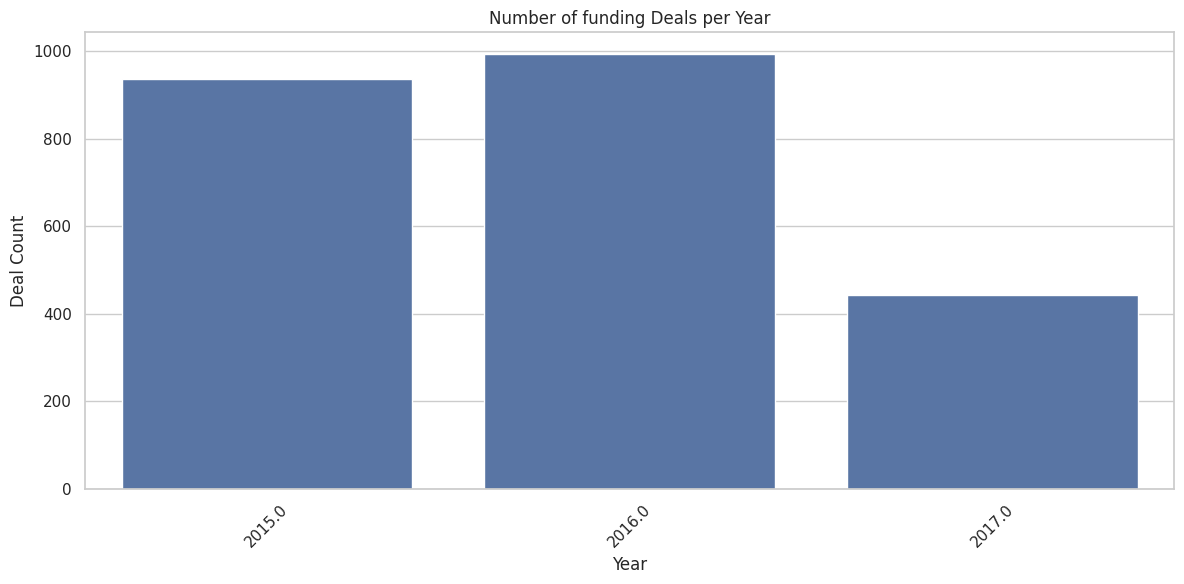

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=df)
plt.title("Number of funding Deals per Year")
plt.xlabel("Year")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

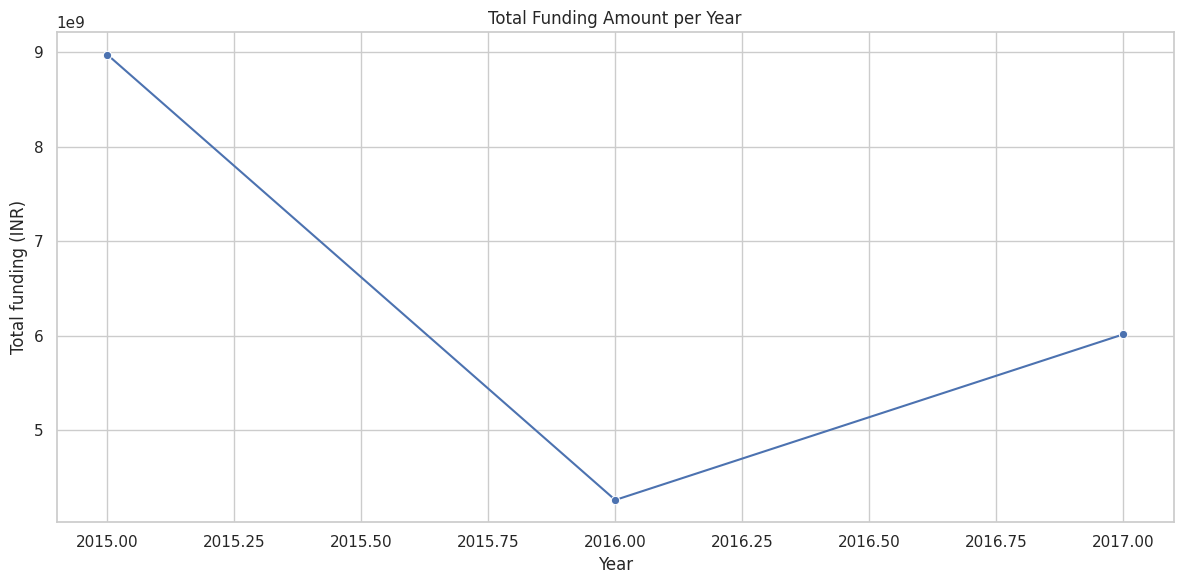

In [ ]:
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Amount_In_INR',data=yearly_funding,marker='o')
plt.title("Total Funding Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total funding (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

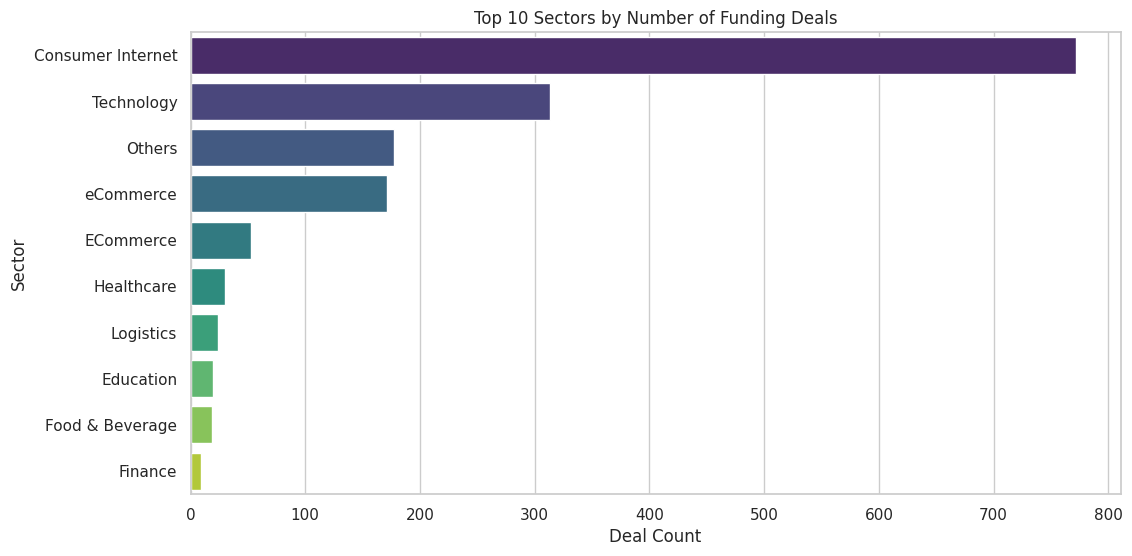

In [ ]:
top_sectors = df['Industry_Vertical'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')
plt.title("Top 10 Sectors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

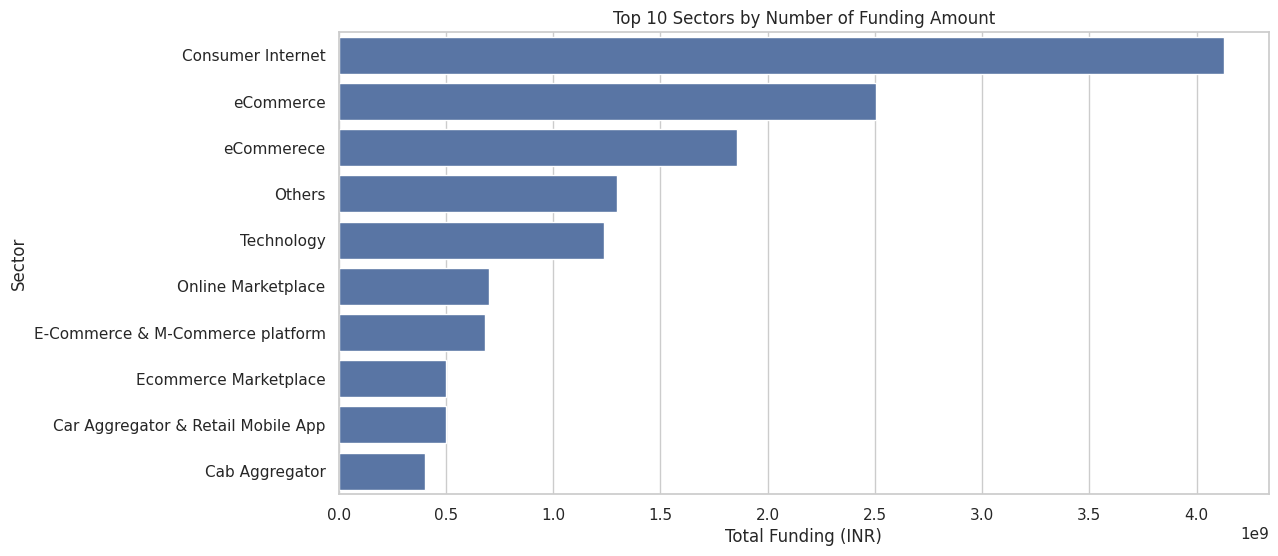

In [ ]:
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce': 'eCommerece'})
sectors_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sectors_funding.values,y=sectors_funding.index)
plt.title("Top 10 Sectors by Number of Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split()
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

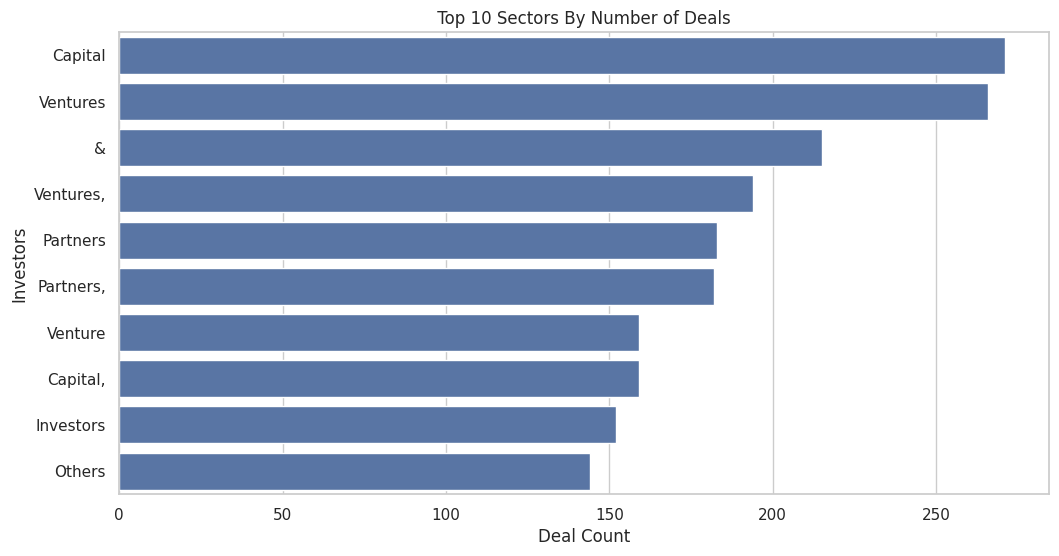

In [ ]:
top_investors_deals = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors_deals.values,y=top_investors_deals.index)
plt.title(" Top 10 Sectors By Number of Deals ")
plt.xlabel("Deal Count")
plt.ylabel("Investors")
plt.show()

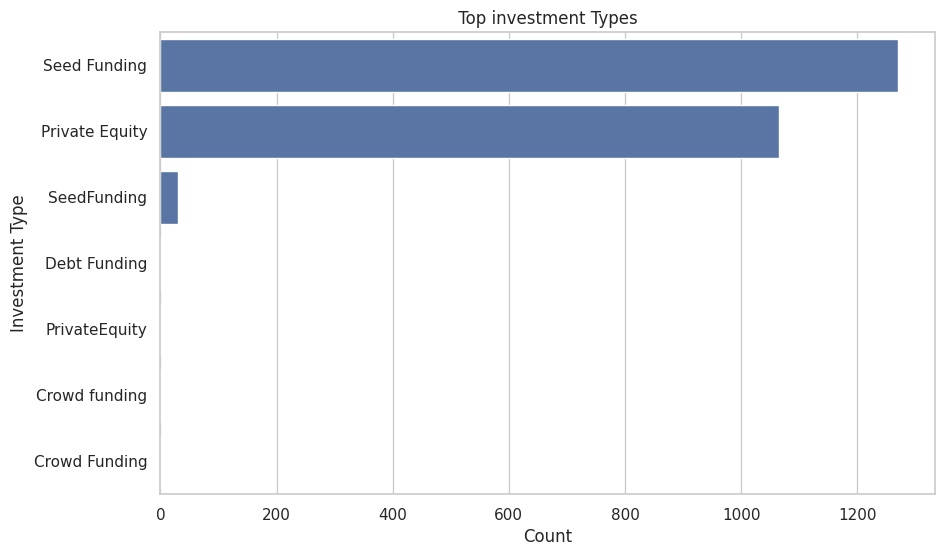

In [ ]:
investment_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=investment_type.values,y=investment_type.index)
plt.title(" Top investment Types ")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

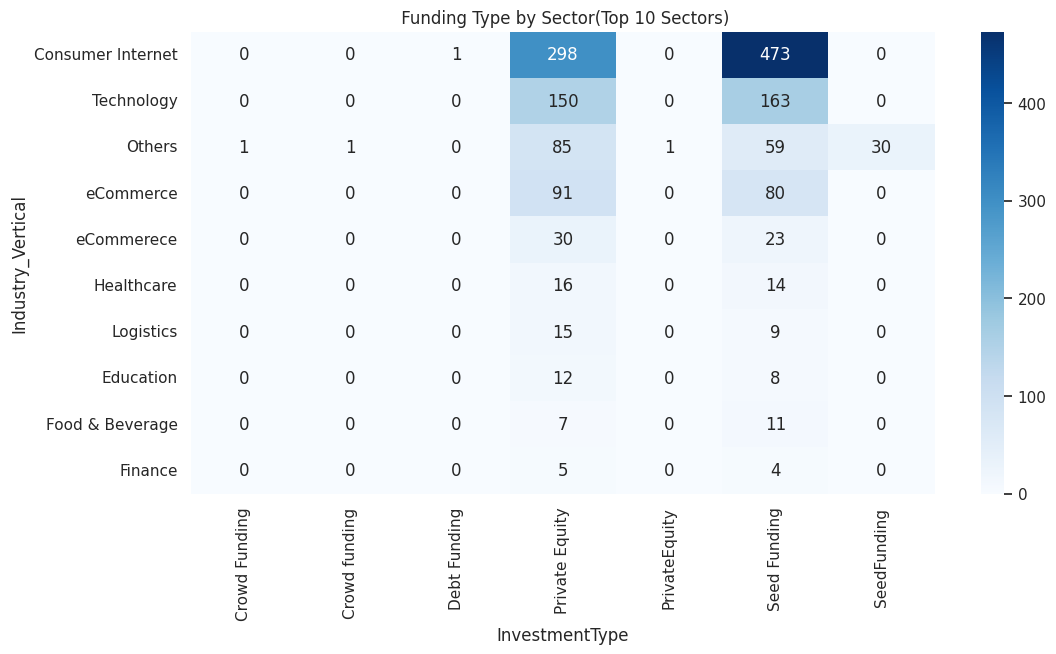

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12,6))
sns.heatmap(sector_stage, annot=True, fmt="d",cmap="Blues")
plt.title(" Funding Type by Sector(Top 10 Sectors)")
plt.show()

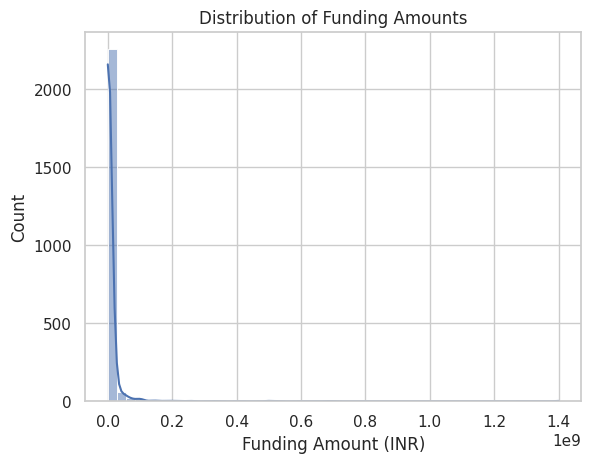

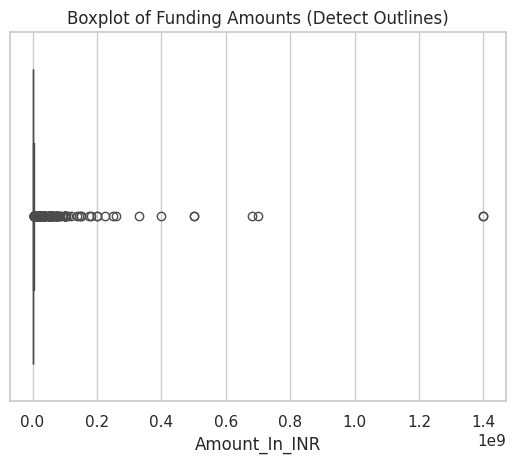

In [ ]:
sns.histplot(df['Amount_In_INR'], bins=50, kde=True)
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amounts (Detect Outlines)")
plt.show()

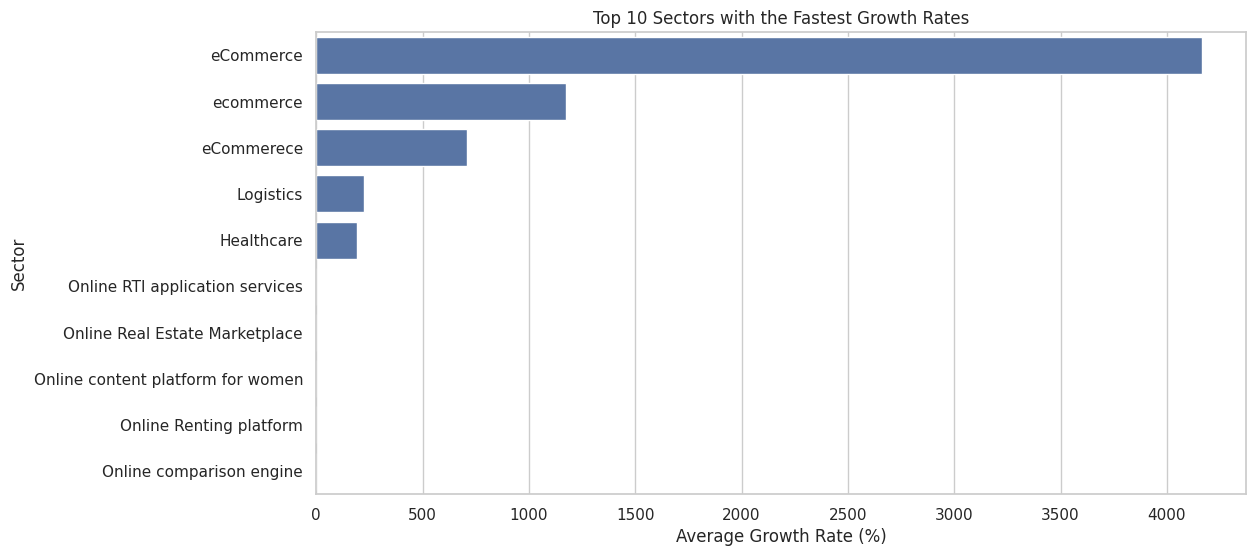

In [ ]:
sector_yearly = df.groupby(['Year','Industry_Vertical'])['Amount_In_INR'].sum().unstack()#.filena
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values * 100, y=sector_growth.index)
plt.title("Top 10 Sectors with the Fastest Growth Rates")
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split()
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investors(name):
    name = name.lower()
    if any(world in name for world in ['venture', 'capital', 'partners','fund','vc','labs']):
        return 'vc'
    elif any(world in name for world in ['angel', 'investors']):
        return 'Angel'
    elif any(world in name for world in ['crop', 'limited','pvt','ltd','ing']):
        return 'Corporate'
    else:
        return 'Others'


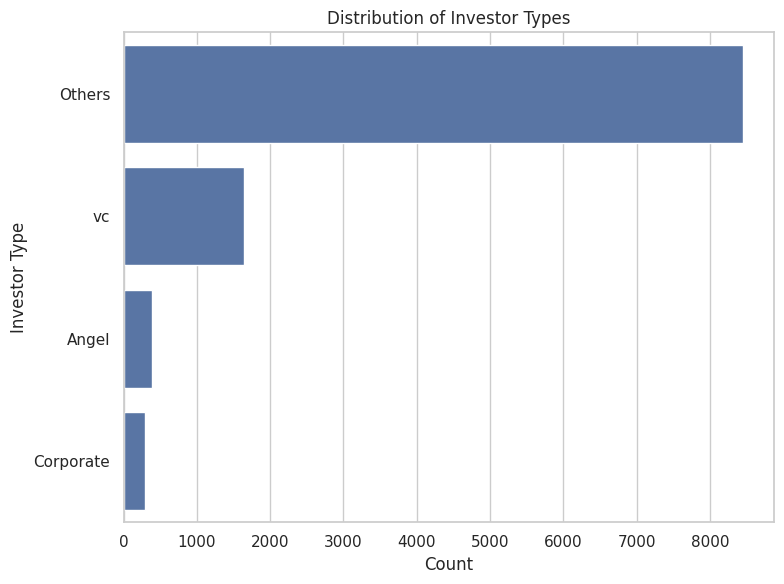

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investors)
Investor_Type_counts = investors_df['Investor_Type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=Investor_Type_counts.values,y=Investor_Type_counts.index)
plt.title("Distribution of Investor Types")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split()
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
investor_startup_count = investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name='DealCount')
repeat_investors = investor_startup_count[investor_startup_count['DealCount']>1]

repeat_investor_summary = repeat_investors['Investors_Name'].value_counts().head(10)

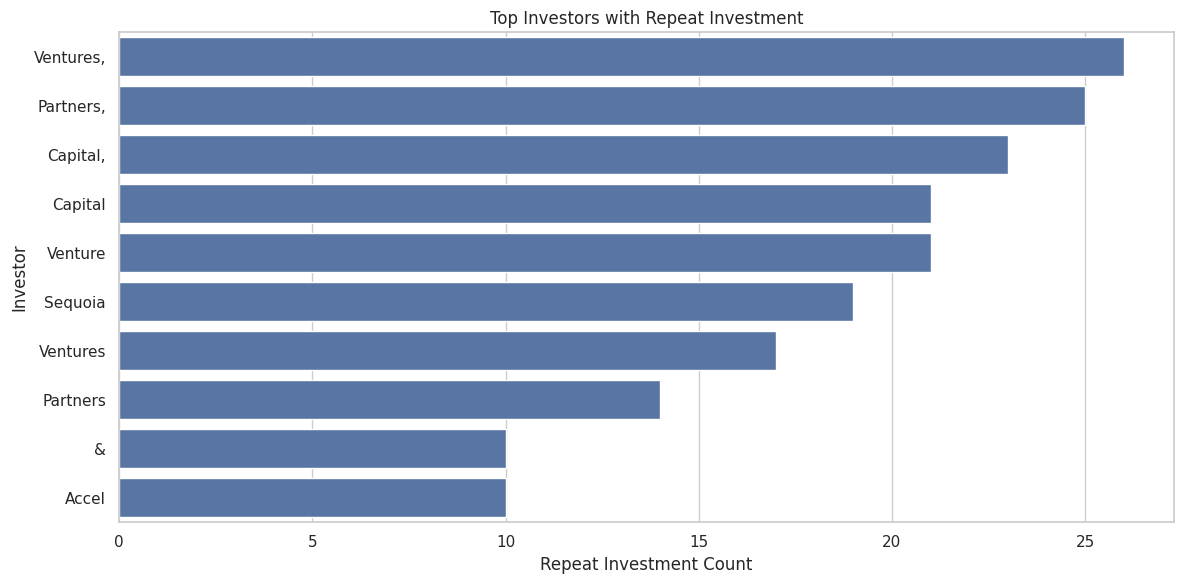

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investor_summary.values,y=repeat_investor_summary.index)
plt.title("Top Investors with Repeat Investment")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

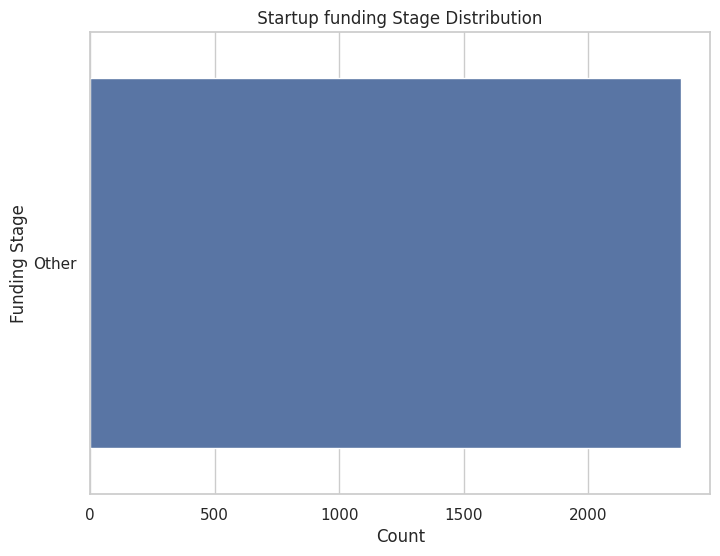

In [ ]:
early_stage = ['Seed','Pre-Seed','Pre-Series']
late_stage = ['Series A','Series B','Series C','Series D','Series E','Private','Equity','Venture_Debt','Debt_Funding']
df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early_Stage' if x in early_stage else ('Late_Stage' if x in late_stage else 'Other'))

plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage',data=df,order=df['Funding_Stage'].value_counts().index)
plt.title(" Startup funding Stage Distribution ")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

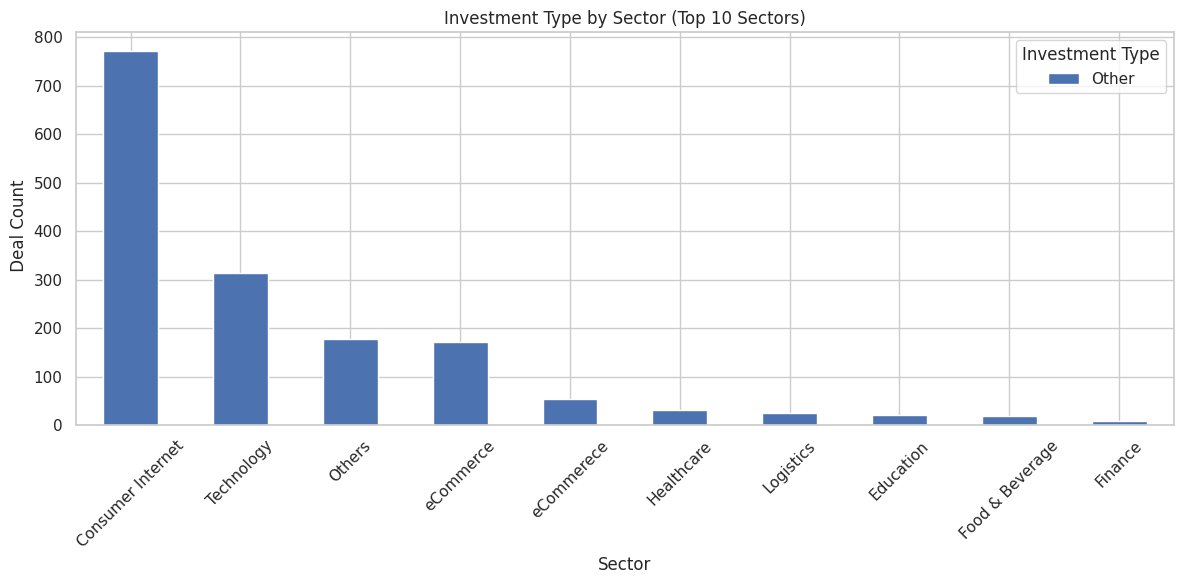

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'],df['Funding_Stage'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title("Investment Type by Sector (Top 10 Sectors)")
plt.xlabel("Sector")
plt.ylabel(" Deal Count")
plt.xticks(rotation=45)
plt.legend(title="Investment Type",loc='upper right')
plt.tight_layout()
plt.show()